In [1]:
from UQpy.reliability import SubsetSimulation
import matplotlib.pyplot as plt
from UQpy.sampling.input_data import MmhInput, StretchInput
from UQpy.sampling import ModifiedMetropolisHastings, Stretch
# First import the file that contains the newly defined Rosenbrock distribution
from Rosenbrock import Rosenbrock
import time
import numpy as np
# Import this newly defined Rosenbrock distribution into the Distributions module
from UQpy.distributions import Normal
from UQpy.RunModel import RunModel
import scipy.stats as stats

MMH Initial Samples

In [2]:
model = RunModel(model_script='Rosenbrock_pfn.py', model_object_name="RunPythonModel", ntasks=1)
dist = Rosenbrock(p=100.)
dist_prop1 = Normal(loc=0, scale=1)
dist_prop2 = Normal(loc=0, scale=10)

x = stats.norm.rvs(loc=0, scale=1, size=(100, 2), random_state=83276)

mcmc_init1 = ModifiedMetropolisHastings(mmh_input=MmhInput(dimension=2, log_pdf_target=dist.log_pdf, seed=x,
                                                           burn_length=1000, proposal=[dist_prop1, dist_prop2],
                                                           random_state=8765))
mcmc_init1.run(10000)

input=StretchInput(log_pdf_target=dist.log_pdf, dimension=2, chains_number=1000, random_state=38546)
x_ss_MMH = SubsetSimulation(mcmc_input=input, runmodel_object=model, conditional_probability=0.1,
                            samples_number_per_subset=10000, samples_init=mcmc_init1.samples)

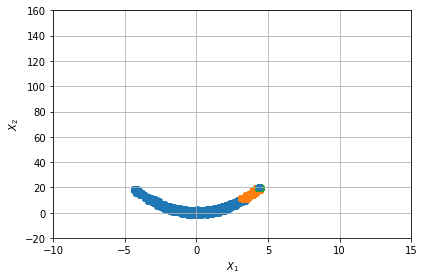

In [3]:
for i in range(len(x_ss_MMH.g)):
    plt.scatter(x_ss_MMH.samples[i][:, 0], x_ss_MMH.samples[i][:, 1], marker='o')
plt.grid(True)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.yticks(np.arange(-20, 180, step=20))
plt.xlim((-10, 15))
plt.tight_layout()
plt.savefig('Rosenbrock_MMH.pdf')
plt.show()

In [4]:
print(x_ss_MMH.pf)

0.0


Stretch Initial Samples

In [5]:
model = RunModel(model_script='Rosenbrock_pfn.py', model_object_name="RunPythonModel", ntasks=1)
dist = Rosenbrock(p=100.)

x = stats.norm.rvs(loc=0, scale=1, size=(100, 2), random_state=83276)

mcmc_init2 = Stretch(stretch_input=StretchInput(dimension=2, log_pdf_target=dist.log_pdf, seed=x,
                                                burn_length=1000, random_state=8765))
mcmc_init2.run(10000)

input=StretchInput(log_pdf_target=dist.log_pdf, dimension=2, chains_number=1000, random_state=83456)
x_ss_Stretch = SubsetSimulation(mcmc_input=input, runmodel_object=model, conditional_probability=0.1,
                                samples_number_per_subset=10000, samples_init=mcmc_init2.samples)

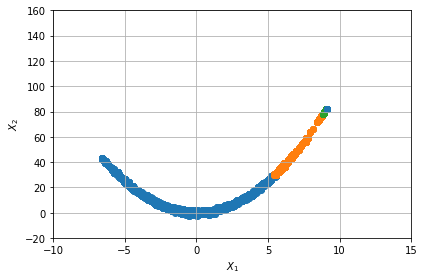

In [6]:
for i in range(len(x_ss_Stretch.g)):
    plt.scatter(x_ss_Stretch.samples[i][:, 0], x_ss_Stretch.samples[i][:, 1], marker='o')
plt.grid(True)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.yticks(np.arange(-20, 180, step=20))
plt.xlim((-10, 15))
plt.tight_layout()
plt.savefig('Rosenbrock_Stretch.pdf')
plt.show()

In [7]:
print(x_ss_Stretch.pf)

0.0


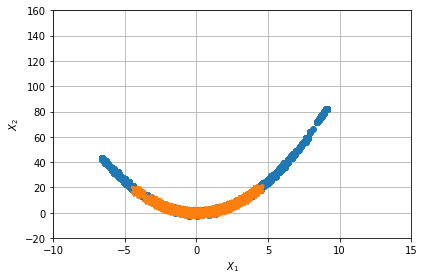

In [8]:
plt.figure()
plt.plot(mcmc_init2.samples[:, 0], mcmc_init2.samples[:, 1], 'o')
plt.plot(mcmc_init1.samples[:, 0], mcmc_init1.samples[:, 1], 'x')
plt.grid(True)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.yticks(np.arange(-20, 180, step=20))
plt.xlim((-10, 15))
plt.tight_layout()
plt.savefig('Rosenbrock_Compare.pdf')
plt.show()